<a href="https://colab.research.google.com/github/Willslva/Cancer_de_Mama/blob/main/2_exploracao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração dos Dados

A exploração de dados pode ser considerada uma das fases mais importantes de todo processo de análise de dados, sendo processo investigativo dos dados. Em que vamos entender mais sobre os dados que envolve a problematica e consequentemente construir hipoteses e perguntas.

Pode-se dizer que  é um ciclo iterativo e ciclico, onde:


*   É preciso gerar questões relevantes para o negócio, sendo necessário, em casos reais, uma conversa com a área de negócio sobre o que a área de negócio está buscando responder através do conjunto de dados.

*   Encontrar as respostas dos questionamentos levantados é preciso gerar gráficos, manipulação e estatística sobre os dados.


A estatística tanto univariada como multivariada é de suma importância para os dados ganharem ainda mais significado, durante a exploração de dados.

#### Visualização de Dados

De acordo com Rosa, a visualização de dados é um ramo do conhecimento que possui uma característica específica, sendo: 

*Uma mensagem predefinida de seus criadores, mas também são interpretados como ferramentas que possibilitam às pessoas tirar suas próprias conclusões sobre os dados.*

Segundo Ribeiro a visualização de dados trata-se do processo em que: 


*Utiliza tecnologias computacionais para transformar dados abstratos em modelos visuais. É a tradução criativa dos dados, que em sua forma original são incapazes de carregar qualquer interpretação profunda.*

Corrêa ponta cinco elementos presentes em boas visualizações ao analisar o passado, presente e futuro da visualização de dados:

*   Ter um conjunto de dados limpos: conjunto de dados apropriado para a maioria das ferramentas de visualização.

*   Única mensagem de comunicação: possibilidade de escolher a mensagem para cada tipo de gráfico.

*   Escolher o gráfico adequado: ajustar a mensagem a partir do gráfico (comparação, distribuição).

*   Design e cor: destacar o essencial utilizando cores


Para a regra de dados limpos foi realizado ações na etapa do tratamento de dados, sendo verificado diferentes perspectivas da base de dados com objetivo de encontrar problemas presente nos dados armazenados.


Sobre o segundo elemento que é única mensagem de comunicação é estimado que quanto mais simples e claro um gráfico ser é melhor, o famoso "menos é mais". 

Um dos problemas principais que envolvem a regra de escolher o gráfico adequado  é os famosos gráficos de pizza e 3D. O principal problema de um gráfico de pizza e 3D são suas análises ser de difícil entendimento, tendo em vista, que não somos bons em fazer comparações de área.

Já sobre o design e cor é trata-se em dá destaque ao que é importante na visualização, evitando distrair quem está visualizando o gráfico. Por mais que pareça algo simples é essencial para compreensão da mensagem que se quer trasmitir por meio do conjunto de dados.


#### Configurações Iniciais

In [ ]:
# importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploração Estatística Descritiva Univariada


Agora de fato, vamos começar a explorar e construir visualizações de dados

In [ ]:
dt = pd.read_csv("data_version1.csv")
dt.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


Após vê o novo rostinho do nosso data frame, precisamos alargar nosso horizonte na procura de conhecer melhor nossas features, com finalidade de realizamos algumas inferências sobre os mesmos.

De ínicio verificamos que os dados presentes em cada feature estão em escalas diferentes, talvez isso afete nosso modelo, então é interessante na etapa do modelo de machine learning realizar testes para entender como o modelo se comporta com os dados em escalas diferentes e também com escalas semelhantes.

Além disso, o boxplot gerado evidencia que a área média (area_mean) possui 25 Entradas acima de 1326.3, representando apenas 4.39% do dataset. Logo, ainda não precisamos nos preocupar com tal feature porque a representação percentual para o data frame é aceitável, além disso, tal feature pode no decorrer do nosso trabalho ser excluída, por motivos diversos, da lista de features que vão ser usadas no modelo machine learning.

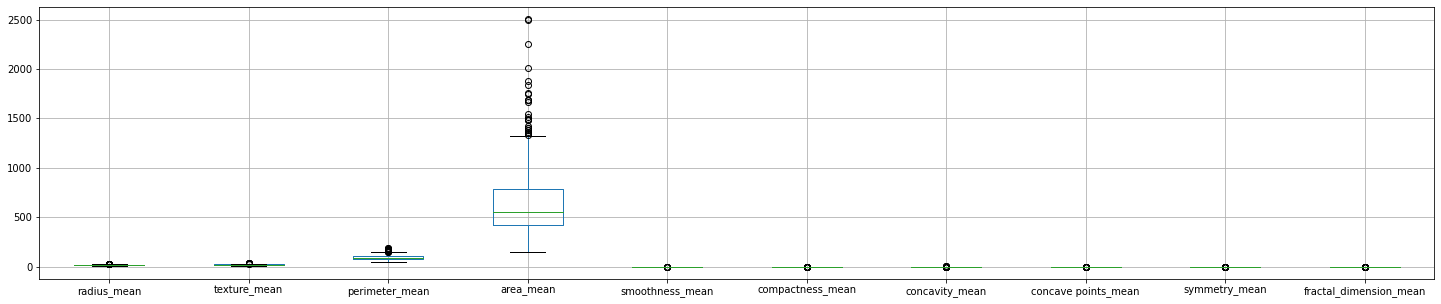

In [ ]:
dt.drop(columns=['diagnosis']).boxplot(figsize=(25,5))
plt.show()

Relembrando que a classe "0" representa diagnóstico maligno, ou seja, o paciente tem câncer de mama, já a classe "1" diz respeito ao diagnóstico benigno sendo excluído do paciente possuir câncer de mama.

As representações visuais a seguir são riquíssimas, em que é comparado cada classe em derminada feature, por meio dessa comparação visual temos liberdade e confiança de apontar as seguintes conclusões:



*   Features como: compactness_mean, concave points_mean e texture_mean	**seriam as preferidinhas do nosso modelo de machine learning** porque existe uma discrepância relavante entre as classes maligno(0) e benigno (1).


*   Já features como: smoothness_mean e symmetry_mean provavelmente seriam utilizads pelo modelo de machine learning, todavia **não teriam tanto peso quanto as features que foram mencionadas** anteriormente, isso porque mediana das classes  maligno(0) e benigno (1) e quartetos tem proximidade de valores atribuídos para as classes. 



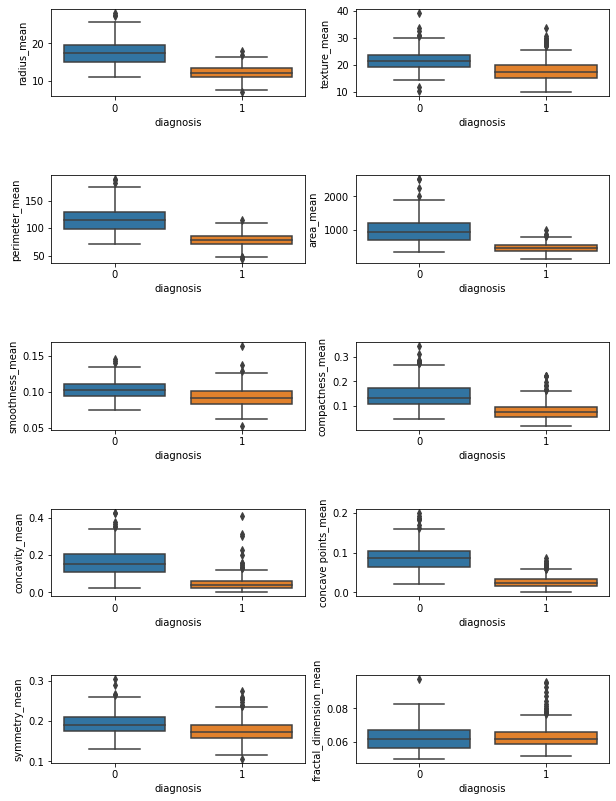

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,20))
fig.subplots_adjust(hspace=.9, wspace=0.2)
i = 1
for j,c in enumerate(dt.columns): 
  if c not in ['diagnosis']:
      ax = fig.add_subplot(7, 2, i)
      sns.boxplot(x='diagnosis',y=c,data=dt)
      i += 1

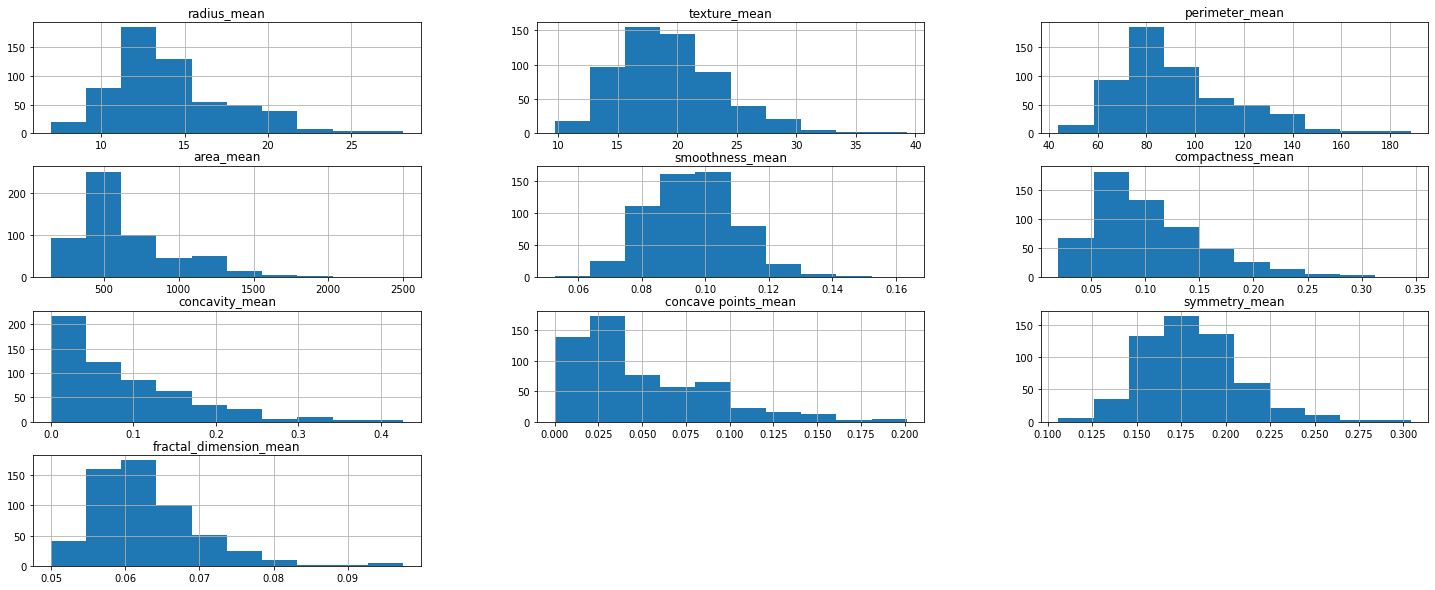

In [ ]:
dt.drop(columns=['diagnosis']).hist(figsize=(25,10))
plt.show()

#### **Verificando dados desbalenceados**

Algo comum de ocorrer em projeto de data science é se deparar com base com dados desbalanceados, tal cenário ocorre quando verificamos que não temos um equilíbrio entre os registros da nossa coluna alvo (variável target).

Por exemplo, considere o caso onde existe uma classe A, majoritária, representada por 98% do data set, enquanto a classe B, minoritária, representa apenas 2%. É uma caso de dados desbalanceados por causa da porcentagem discrepante que possi a classe A, e dessa forma haver enviesamento do nosso modelo resultando em um falso "bom desempenho".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


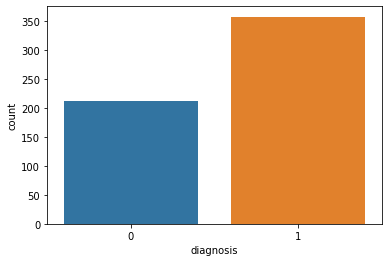

In [ ]:
sns.countplot(dt['diagnosis'],label="Count")

In [ ]:
#Contagem dos registros da coluna alvo (diagnosis)
dt.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**Nossa variavel alvo (diagnosis) possui uma distribuição considerada igualitária**, porém, se caso tivéssemos dados desbalanceados, deveriamos balanceá-los primeiro.

**As técnicas mais comuns para balanceamento de dados** é através de reamostragem (resampling). Podendo ser feito de duas formas básicas:

**Undersampling**: removemos dados da classe majoritária;

**Oversampling**: reamostramos dados da classe minoritária;
Obviamente, existiriam muitas outras tarefas a serem realizadas, mas infelizmente, esse conjunto de dados, não é um conjunto de dados que apresenta muitos problemas nos registros de seus dados, logo, não é necessária uma limpeza profunda do conjunto dos dados.

# Exploração Estatística Descritiva Multivariada


Agora vamos ter um primeiro entendimento das variaveis que possivelmente se correlacionam e impactam no diagnóstico de benigno ou maligno. Encontrar essas variáveis é de extrema importância para quando formos construir o nosso modelo.

Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. Então, estamos interessados em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

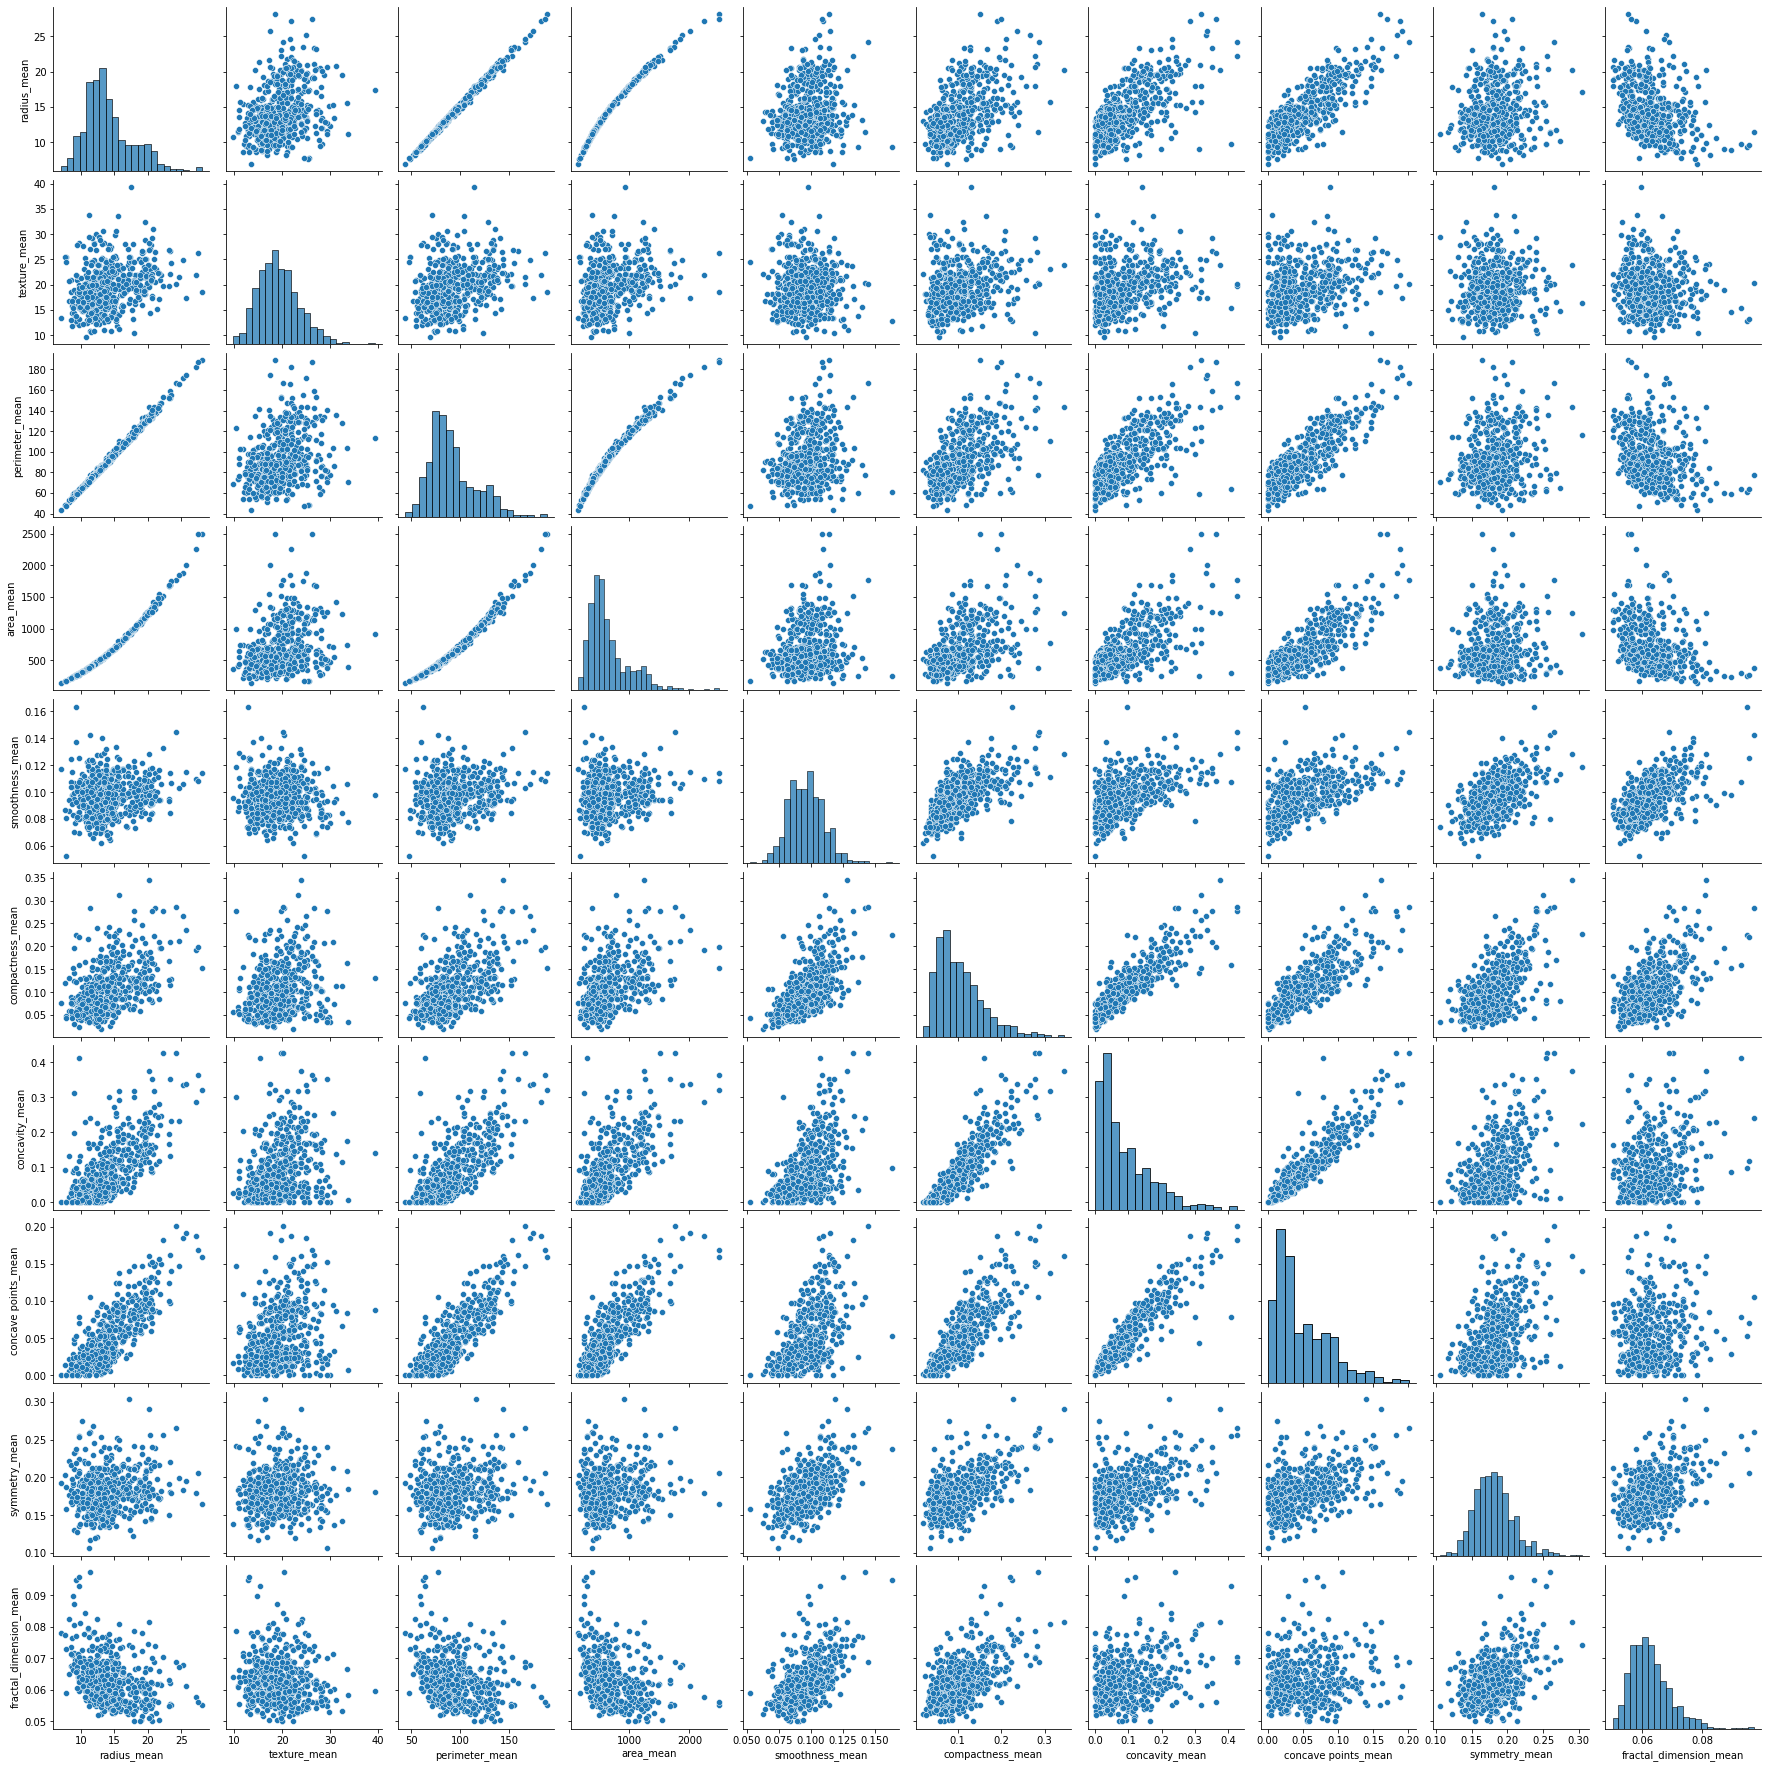

In [ ]:
## GRÁFICO PARA ANALISAR A RELAÇÃO ENTRE AS VARIÁVEIS
sns.pairplot(dt.drop(columns=['diagnosis']))
plt.show()

O seguinte gráfico possibilita compreender quais variáveis tem alta correlação entre as mesmas. Percebemos tal configuração por meio das imagens geradas para cada "casal" de variáveis. 

Por exemplo, quando olhamos para a relação de texture_mean e concavity_mean percebemos que os pontos são dispersos e possui determinada concentração maior em faixa de valores atribuídos para as mesmas, mas não é percebido que tem uma alta correção entre as mesmas.

Já quando verificamos o radius_mean e a area_mean, percebemos alta relação entre as duas observando que quando a área média da célula aumenta é consequentemente aumentado o raio médio. Percebemos os pontos no gráfico tendo um comportamento exponencial. **E isso é bom para o modelo de machine leraning?** Não, não devemos utilizar variáveis com alta relação no modelo porque o mesmo vai ser enviesado por causa dessa alta relação.



Por meio do gráfico que vimos é possível já entender que variáveis devemos evitar adicionar no nosso modelo de machine leraning, assim sendo, iremos gerar o mapa de calor impresso que contém valores correlatos que pertencem a nossa variável targe diagnóstico para nos ajudar a visualizar os dados, tornando compreensível e fácil a escolha de quais variáveis devem ser escolhidas para nosso modelo levando em consideração estatítica.



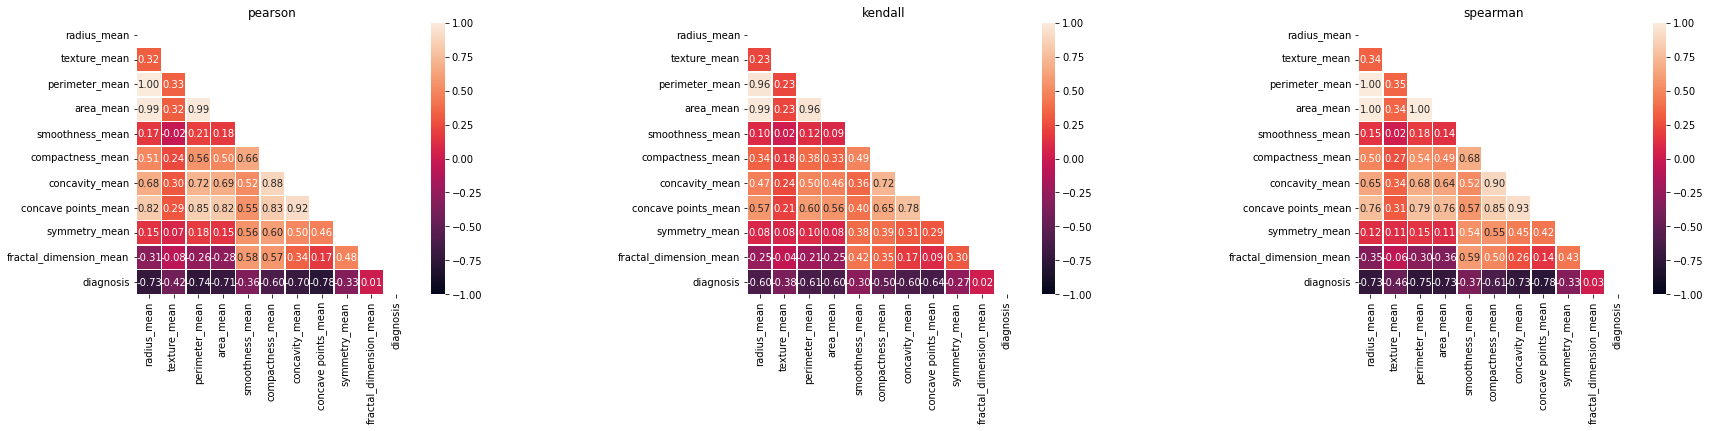

In [ ]:

fig, axs = plt.subplots(1,3, figsize=(30, 5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr     = dt.corr()
kendall  = dt.corr('kendall')
spearman = dt.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f",linewidths=.5,ax = axs[2])

axs[0].set_title("pearson")
axs[1].set_title("kendall")
axs[2].set_title("spearman")

#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 45)
#axs[1].set_xticklabels(axs[1].get_xticks(), rotation = 45)
#axs[2].set_xticklabels(axs[2].get_xticks(), rotation = 45)

plt.show()

O mapa de calor impresso acima contém valores correlatos que pertencem a nossa variável targe blueWins.

Os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).

E podemos observar que na diagonal, os quadrados representam a correlação das variáveis, e foi identificado que exite algumas variáriaveis que possui uma forte correlação com outras variáveis, e inclusive com nossa variável alvo que é o diagnóstico. Esse cenário é interessante para nosso futuro modelo de machine learning porque o mesmo vai ser enviesado por causa dessa correção elevanta que gerar redundância informacional. Assim sendo, segue a lista de variáveis que precisam ser excluídas do nosso data frame:

*   radius_mean
*   perimeter_mean
*   area_mean
*   concavity_mean
*   oncave points_mean

As variáveis que sobraram possui nível de correlação com as outras aceitável, e isso é verificado porque o nível de correlação das mesmas é entre 0,03 à 0.66. Segue a lista de variáveis que serão utilizadas no modelo de machine learning:

*   texture_mean	
*   smoothness_mean	
*   compactness_mean	
*   symmetry_mean	
*   fractal_dimension_mean

Nos casos reais, na maioria das vezes, o pessoal da área de negócios que tem um maior entendimento da problemática e o contexto que envolve os dados, por isso são os principais responváveis por gerarem as perguntas que se deseja responder na análise exploratória de dados.

A análise exploratoria deve se chegar ao fim quando for identificado que já se atingiu o objetivo desejado e os questionamentos principais já foram respondidos, sendo nos casos reais responsabilidade do pessoal da área de negócios decidir a satisfatoriedade da análise exploratória ou não.

Ainda poderíamos contruir uma etapa de teste de hipótese, porém não vamos focar nessa parte mais técnica e investigativa, e por esse motivo acredito que os nossos questionamento sobre as variáveis se encerraram. Logo, podemos começar a construção do nosso modelo de Machine Learning.

# Salvando modificações


É interessante salvar as modificações realizadas em cada etapa concluída no projeto de data science.

Como não houve nenhuma alteração nos dados nessa etapa do projeto, e esse estagio do projeto foi realizadas descobertas importantes do comportamento e estado dos das variáveis, então não existe a necessidade de realizar a ação de salvar modificações.


<p> Vamos para próxima fase do projeto que é referente modelagem de modelos e interpretação do modelo que foi elegido como o melhor para o cenário do projeto, importante ressaltar que na próxima etapa iremos excluir as variáveis com alto valor de correlação.</p>

